## Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

## Load files

#### Usage

In [3]:
df = pd.read_csv('Full Eletric Interval 042016.csv', skiprows = 4)

In [4]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Start Time'])

#### Properties

In [5]:
df2 = pd.read_excel('SIMS_Property_List_4-6-2016.xlsx')

#### Weather

In [6]:
df3 = pd.read_csv('weather_prepared_final.csv')

In [7]:
df3.DATE = pd.to_datetime(df3.DATE)

## List of building codes

In [8]:
codes = pd.Series([b[0] for b in df['Meter'].str.split()])

In [9]:
unicodes = codes.unique()

In [10]:
df['Codes'] = codes

## Lab  data

In [11]:
labs = []
for i in range(879):
    if df2['Building Use'][i]=='Laboratory':
        labs.append(df2['Property Code'][i])

In [12]:
dflabs = df[codes.isin(labs)]

### Total building data

In [13]:
dftot = dflabs.groupby(['Datetime']).sum()

## Add weather data

In [14]:
belltemp = df3.iloc[::4, :]

In [15]:
belltemp = belltemp.rename(columns={'DATE':'Datetime'})

In [16]:
belltemp.index = belltemp.Datetime

In [17]:
regtemp = df3.iloc[1::4, :]

In [18]:
regtemp = regtemp.rename(columns={'DATE':'Datetime'})

In [19]:
regtemp.index = regtemp.Datetime

In [20]:
dfweather = dftot.join(pd.DataFrame(regtemp['TEMPERATURE']))

## Average lab data by time of day

In [21]:
timelst = []
for i in range(0, 48):
    tot = 0
    j = i
    while j < 35037:
        tot += dftot['Usage'][j]
        j += 48
    timelst.append(tot / 731)

In [89]:
times = []
for i in range(0,48):
    times.append(df['Start Time'][i])
dftime = pd.DataFrame(timelst, index = pd.Series(times))

## Labs bar plot by time of day

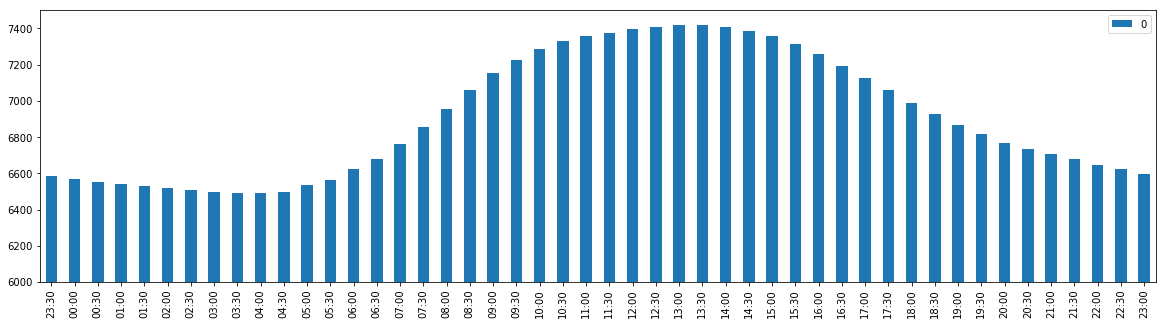

In [95]:
dftime.plot.bar(figsize=(20,5), ylim=(6000, 7500))

##  Labs scatter plot by temperature

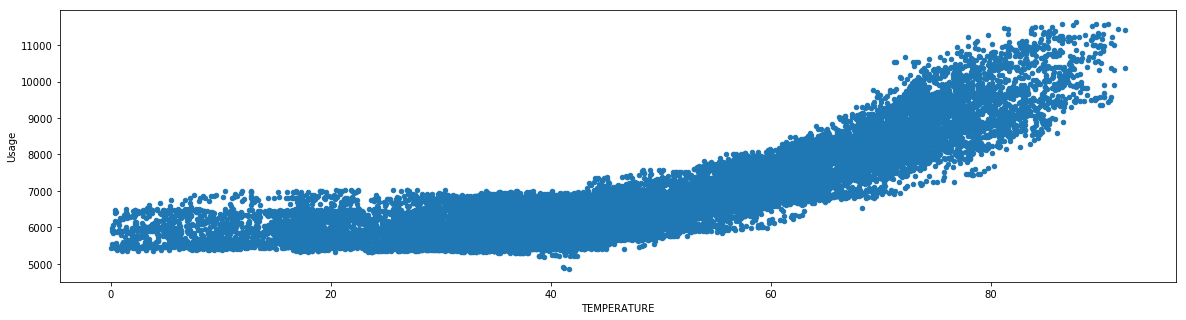

In [24]:
dfweather.plot.scatter(x = 'TEMPERATURE', y = 'Usage', figsize=(20,5))

## Labs data by date

In [97]:
dfdate = dftot
dfdate['Date'] = dfdate.index.date

In [98]:
dfdate = dfdate.groupby(['Date']).mean()

## Labs line plot by date

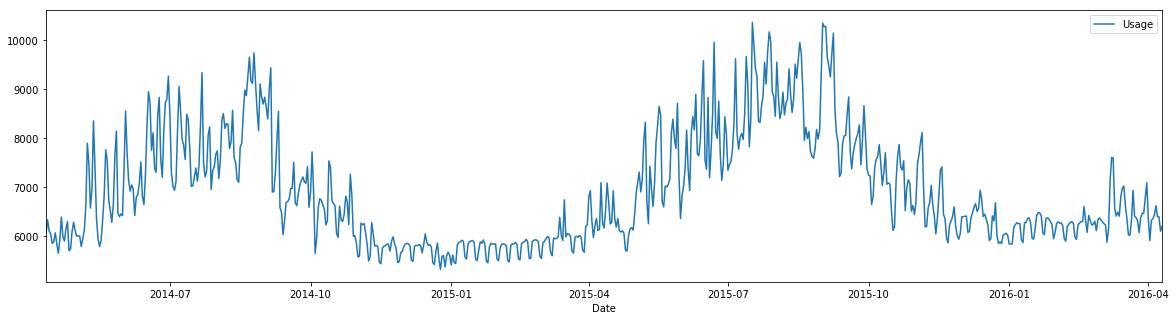

In [101]:
dfdate.plot(y='Usage', figsize=(20,5))

## Labs bar plot by days of week

In [109]:
dfweekdaytot = dftot
dfweekdaytot['Day'] = dftot.index.weekday

In [110]:
dfweekday = dfweekdaytot.groupby(['Day']).mean()

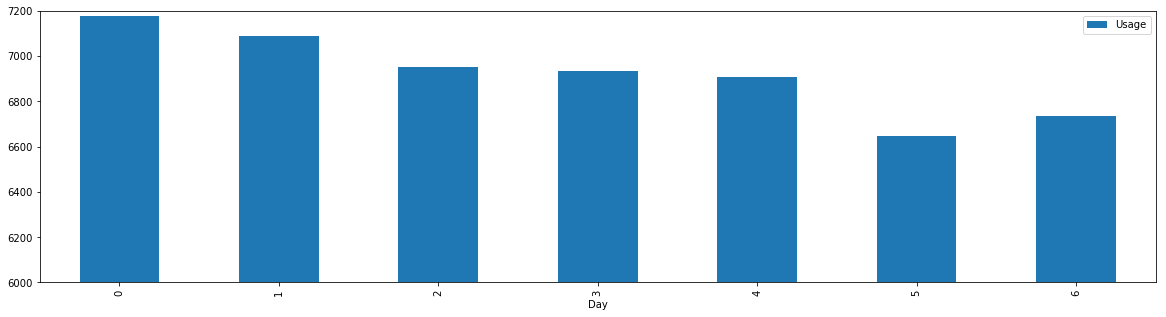

In [122]:
dfweekday.plot.bar(y='Usage', figsize=(20,5), ylim=(6000, 7200))

## Lab data by month

In [124]:
dfmonthtot = dftot
dfmonthtot['Month'] = dftot.index.month

In [127]:
dfmonth = dfmonthtot.groupby(['Month']).mean()

## Lab bar plot by month

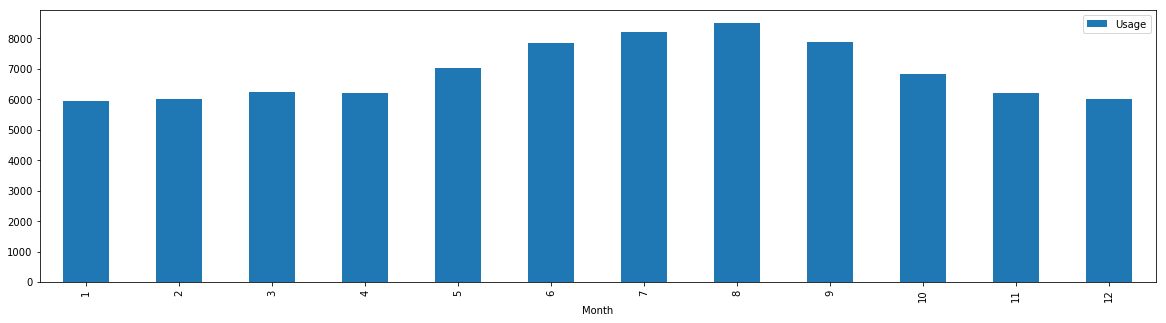

In [128]:
dfmonth.plot.bar(y='Usage', figsize=(20,5))